# Pilot data analysis

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
prop = font_manager.FontProperties(fname="C:\WINDOWS\Fonts\opensans-light.ttf")
matplotlib.rcParams['font.family'] = prop.get_name()
matplotlib.rcParams['axes.facecolor'] = '#fbfbfb'

os.chdir('../..')

## Load data

I forgot to include reward and shock information for every state in the task output so we get that from the trial info file

In [2]:
subjects = [4002]

data_dir = 'C:\Users\Toby\OneDrive - University College London\MEG/task\Data/behavioural\pilot'
trial_info = pd.read_csv('task\Task_information/trial_info.csv')


## Plot responses

Here we plot the subjects' responses against the outcomes for each state. Some trials are missing choices - this is because these were "outcome only" trials where the subject sees the value of a random terminal state (and potentially receives a shock) without making any moves. Missed responses are also not shown.

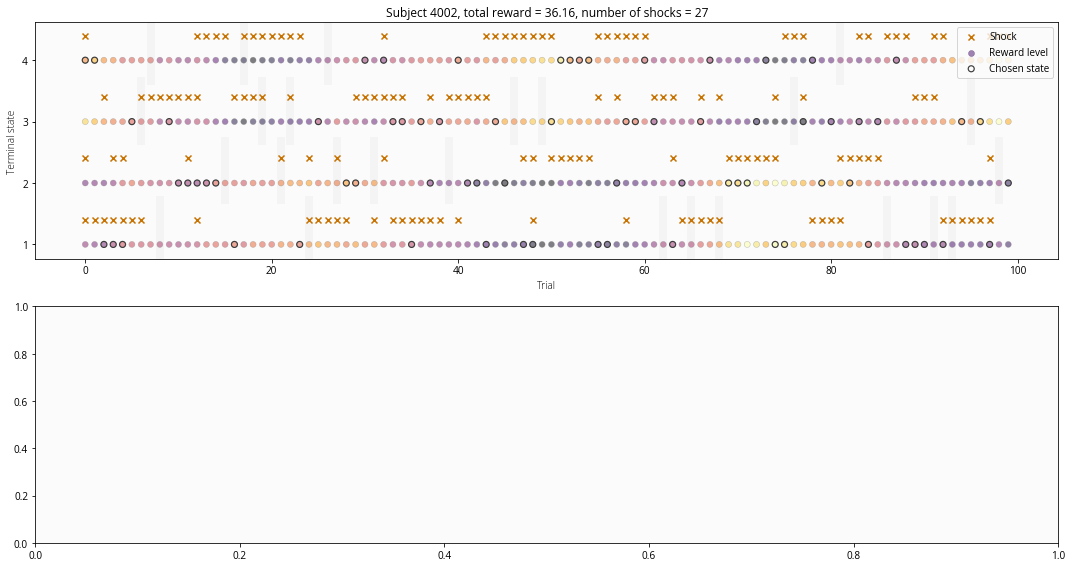

In [3]:
f, ax = plt.subplots(2, 1, figsize=(15, 8))
gap = 0.4

for n, i in enumerate(subjects):

    # Find subject data
    data = [j for j in os.listdir(data_dir) if 'Subject{0}'.format(i) in j]   
    data = pd.read_csv(os.path.join(data_dir, data[0]))

    # Recode final state variable (7-10 -> 0-3)
    data['State_3'] = data['State_3'] - 7

    # Plot
    # Reward levels
    for k in range(4):
        if k == 0:
            r_label = 'Reward level'
            s_label = 'Shock'
        else:
            r_label = None
            s_label = None

        trial_info.loc[trial_info['{0}_shock'.format(k)] == 0, '{0}_shock'.format(k)] = np.nan  # recode zero shocks to nan

        ax[n].scatter(range(len(trial_info)), trial_info['{0}_shock'.format(k)] * k + gap,
                    facecolors='#c87200', label=s_label, marker='x')
        ax[n].scatter(range(len(trial_info)), np.ones(len(trial_info)) * k, edgecolors='gray', linewidth=0.5,
                    c=trial_info['{0}_reward'.format(k)], cmap='inferno', label=r_label, alpha=0.5)

    # Choices
    ax[n].scatter(range(len(data)), data['State_3'], edgecolors='#3d3d3d', linewidths=1.2,
                  label='Chosen state', facecolors='none')
    ax[n].set_yticks(range(4), range(4))
    ax[n].set_xlabel("Trial", fontweight='light')
    ax[n].set_ylabel("Terminal state", fontweight='light')
    ax[n].set_yticks(range(0, 4))
    ax[n].set_yticklabels(range(1, 5))
    
    # outcome only trials
    for j in range(len(trial_info)):
        if trial_info.trial_type[j] == 1:
            ax[n].axvline(j, color='#f4f4f4', lw=8, zorder=0, ymin=(trial_info.end_state[j] - 7) / 4., ymax=(trial_info.end_state[j] - 6) / 4.)

    # legend
    if n == 0:
        legend = ax[n].legend()
        legend.legendHandles[1].set_color(plt.cm.inferno(.2))
    ax[n].set_title('Subject {0}, total reward = {1}, number of shocks = {2}'.format(i, data.Reward_received.sum(), data.Shock_received.sum().astype(int)))

plt.tight_layout()
plt.show()

In [19]:
ax.shape

(2L,)